## 1.Dataset Selection

The dataset is a healthcare dataset related to stroke prediction. Here's an overview of its structure and contents:
Number of Rows: 5,110
Number of Columns: 12
Columns:

*id*: Unique identifier for each individual.

*gender*: Categorical variable indicating gender (Male, Female, Other).

*age*: Numeric variable representing the age of the individual (range: 0.08 to 82 years).

*hypertension*: Binary variable (0 = No, 1 = Yes) indicating whether the individual has hypertension.*

*heart_disease*: Binary variable (0 = No, 1 = Yes) indicating if the individual has any heart disease.

*ever_married*: Categorical variable indicating if the individual has ever been married (Yes, No).

*work_type*: Categorical variable representing the type of employment (Private, Self-employed, Govt_job, Children, Never_worked).

*Residence_type*: Categorical variable for place of residence (Urban, Rural).

*avg_glucose_level*: Numeric variable representing the average glucose level.

*bmi*: Numeric variable representing the body mass index (BMI). This column has some missing values (~4%).

*smoking_status*: Categorical variable indicating the smoking habits (formerly smoked, never smoked, smokes, Unknown).

*stroke*: Binary target variable (0 = No, 1 = Yes), indicating whether the individual had a stroke.

## Objective
The main objective is to analyze the dataset and predict the stroke.

## 2. Data Loading and Cleaning

In [120]:
import pandas as pd

In [121]:
import os

# Getting the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory:", cwd)

Current working directory: C:\Users\vinay


In [122]:
# Loading the dataset into a Pandas DataFrame
file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)
# Display the first few rows to verify loading
print(data.head(10))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

In [123]:
#Getting all the columns in the dataset
data.columns = data.columns.str.strip()
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


## Exploring the dataset

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## statistical summary

In [125]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


### Identifying Categorical Columns

In this dataset, some columns are categorical even if they are represented with numerical values. We need to manually specify these columns to ensure proper processing.

In [126]:
# Manually specifying categorical columns
categorical_cols = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Explanation of categorical columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [127]:
# Getting all numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the numerical columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


## Getting Nominal cloumns

In [128]:
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Define a set of ordinal columns (based on your earlier analysis or understanding)
ordinal_columns = ['work_type', 'smoking_status']  # Update this list with your ordinal variables

# Identify nominal columns (categorical columns that are NOT in the ordinal list)
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

# Print the nominal columns
print("Nominal Columns:", nominal_columns)

Nominal Columns: ['gender', 'ever_married', 'Residence_type']


## Getting categorical columns

In [129]:
data.columns = data.columns.str.strip()

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print the categorical columns
print("Categorical Columns:", categorical_columns)

# Show unique values in each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}': {data[col].unique()}")
    print('-' * 50)

Categorical Columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Unique values in 'gender': ['Male' 'Female' 'Other']
--------------------------------------------------
Unique values in 'ever_married': ['Yes' 'No']
--------------------------------------------------
Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
--------------------------------------------------
Unique values in 'Residence_type': ['Urban' 'Rural']
--------------------------------------------------
Unique values in 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
--------------------------------------------------


## Checking for Missing Values

Before proceeding, it's important to check for missing values in the dataset.

In [130]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Hence, BMI colums has missing values we will drop the rows with missing values.

## Identifying and Dropping Rows with More Than 3 Missing Values

In [131]:
# Count missing values per row
missing_values_per_row = data.isnull().sum(axis=1)

# Identify rows to drop
rows_to_drop = missing_values_per_row[missing_values_per_row > 3].index

# Drop the rows
data.drop(index=rows_to_drop, inplace=True)

print(f"Dropped {len(rows_to_drop)} rows with more than 3 missing values.")

Dropped 0 rows with more than 3 missing values.


In [132]:
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Drop rows where 'bmi' is missing
data = data.dropna(subset=['bmi'])

# Display the number of remaining rows and the first few rows
print(f"Remaining rows after dropping missing 'bmi' values: {data.shape[0]}")
print(data.head())

Remaining rows after dropping missing 'bmi' values: 4909
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1  

## Identifying and Dropping Columns with More Than 30% Missing Values

Next, we'll identify columns with more than 30% missing values and drop them.

In [133]:
# Calculate the percentage of missing values per column
missing_values_per_column = data.isnull().mean()

# Identify columns to drop
columns_to_drop = missing_values_per_column[missing_values_per_column > 0.3].index

# Drop the columns
data.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: []


In [134]:
#data.dropna(inplace=True)

In [135]:
missing_data_after = data.isnull().sum()
print("\nMissing Values After Handling:\n", missing_data_after[missing_data_after > 0])


Missing Values After Handling:
 Series([], dtype: int64)


In [136]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


## Identifying Nominal and Ordinal Variables

In [137]:
nominal_variables = ['gender', 'ever_married', 'Residence_type', 'smoking_status']
ordinal_variables = ['work_type']  # Assuming 'work_type' has an inherent order

# Display the results
print("\nNominal Variables:", nominal_variables)
print("Ordinal Variables:", ordinal_variables)


Nominal Variables: ['gender', 'ever_married', 'Residence_type', 'smoking_status']
Ordinal Variables: ['work_type']


In [138]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Nominal variables: They don't naturally follow a sequence. Examples are status as a smoker and gender.
Ordinal Variables: These are ranked or have a set order. If you think there is a hierarchy, one example would be the kind of work (private, government, self-employed, etc).

The dataset contains the following columns:

id: Unique identifier for each record.
gender: Categorical variable (Male/Female).
age: Continuous variable.
hypertension: Binary variable (0 or 1).
heart_disease: Binary variable (0 or 1).
ever_married: Categorical variable (Yes/No).
work_type: Categorical variable with multiple levels.
Residence_type: Categorical variable (Urban/Rural).
avg_glucose_level: Continuous variable.
bmi: Continuous variable with some missing values.
smoking_status: Categorical variable (formerly smoked, never smoked, smokes, unknown).
stroke: Binary variable (0 or 1).

## Ordinal Encoding for Ordered Variables

In [139]:


# Define the orders for the categorical columns
gender_order = ['Male', 'Female', 'Other']  # Ordinal order for gender (if needed)
ever_married_order = ['No', 'Yes']  # Ordinal order for ever_married
work_type_order = ['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed']  # Ordinal order for work_type
residence_type_order = ['Rural', 'Urban']  # Ordinal order for Residence_type
smoking_status_order = ['never smoked', 'formerly smoked', 'smokes', 'Unknown']
#stroke_order = [1,0,1,0]

# Initialize the OrdinalEncoder for each column
ordinal_encoder_gender = OrdinalEncoder(categories=[gender_order])
ordinal_encoder_ever_married = OrdinalEncoder(categories=[ever_married_order])
ordinal_encoder_work_type = OrdinalEncoder(categories=[work_type_order])
ordinal_encoder_residence_type = OrdinalEncoder(categories=[residence_type_order])
ordinal_encoder_smoking_status = OrdinalEncoder(categories=[smoking_status_order])
#ordinal_encoder_stroke_status = OrdinalEncoder(categories=[stroke_order])

# Encode the columns
data['gender_encoded'] = ordinal_encoder_gender.fit_transform(data[['gender']])
data['ever_married_encoded'] = ordinal_encoder_ever_married.fit_transform(data[['ever_married']])
data['work_type_encoded'] = ordinal_encoder_work_type.fit_transform(data[['work_type']])
data['Residence_type_encoded'] = ordinal_encoder_residence_type.fit_transform(data[['Residence_type']])
data['smoking_status_encoded'] = ordinal_encoder_smoking_status.fit_transform(data[['smoking_status']])
#data['stroke_status_encoded'] = ordinal_encoder_smoking_status.fit_transform(data[['stroke_status']])
# Display the updated dataset with the encoded columns
print(data[['gender', 'gender_encoded', 
            'ever_married', 'ever_married_encoded', 
            'work_type', 'work_type_encoded', 
            'Residence_type', 'Residence_type_encoded',
                'smoking_status', 'smoking_status_encoded','stroke']])

      gender  gender_encoded ever_married  ever_married_encoded  \
0       Male             0.0          Yes                   1.0   
2       Male             0.0          Yes                   1.0   
3     Female             1.0          Yes                   1.0   
4     Female             1.0          Yes                   1.0   
5       Male             0.0          Yes                   1.0   
...      ...             ...          ...                   ...   
5104  Female             1.0           No                   0.0   
5106  Female             1.0          Yes                   1.0   
5107  Female             1.0          Yes                   1.0   
5108    Male             0.0          Yes                   1.0   
5109  Female             1.0          Yes                   1.0   

          work_type  work_type_encoded Residence_type  Residence_type_encoded  \
0           Private                3.0          Urban                     1.0   
2           Private              

In [140]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_encoded', 'ever_married_encoded',
       'work_type_encoded', 'Residence_type_encoded',
       'smoking_status_encoded'],
      dtype='object')


This will give us a new columns  that contains ordinal values based on the order, which we can then use for further analysis.

## One-Hot Encoding for Nominal Variables

One-Hot Encoding is a method for improving predictions by transforming categorical information into a format that machine learning algorithms can exploit. 

In our dataset gender ever_married,work_type,Residence_type,smoking_status (though this was previously identified as ordered, it can also be treated as nominal)

In [141]:
# Performing  One-Hot Encoding on nominal variables
nominal_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Using get_dummies to create one-hot encoded variables
data_encoded = pd.get_dummies(data, columns=nominal_variables, drop_first=True)

# Displaying  the first few rows of the encoded dataset
print(data_encoded.head())

      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   
5  56669  81.0             0              0             186.21  29.0       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0             0.0                   1.0                3.0   
2             0.0                   1.0                3.0   
3             1.0                   1.0                3.0   
4             1.0                   1.0                4.0   
5             0.0                   1.0                3.0   

   Residence_type_encoded  smoking_status_encoded  gender_Male  gender_Other  \
0                     1.0                     1.0         True    

## Splitting the Data into Training and Test Sets

To prepare the data for modeling, we'll split it into training and test sets. We'll use an 80/20 split.

In [142]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_encoded', 'ever_married_encoded',
       'work_type_encoded', 'Residence_type_encoded',
       'smoking_status_encoded'],
      dtype='object')


In [143]:
print(data.dtypes)

id                          int64
gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded            float64
ever_married_encoded      float64
work_type_encoded         float64
Residence_type_encoded    float64
smoking_status_encoded    float64
dtype: object


In [144]:
from sklearn.model_selection import train_test_split
# assuming the target variable is 'stroke' and the features are all other columns
X = data.drop(columns=['stroke'])  # Features
y = data['stroke']  # Target variable

# Spliting the data into training and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (3927, 16)
Test set shape: (982, 16)
Training target shape: (3927,)
Test target shape: (982,)


In [145]:
# Selecting the encoded columns only for X (features)
encoded_columns = ['gender_encoded', 'ever_married_encoded', 'work_type_encoded', 
                   'Residence_type_encoded', 'smoking_status_encoded']  # Add other encoded columns here

X = data[encoded_columns]
y = data['stroke']  # Target variable should be numeric already

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Include both encoded and numeric columns in X
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
encoded_columns = ['gender_encoded', 'ever_married_encoded', 'work_type_encoded', 
                   'Residence_type_encoded', 'smoking_status_encoded']  # Encoded categorical columns

# Combine encoded and numeric columns
X = data[encoded_columns + numeric_cols]
y = data['stroke']  # Target variable

In [147]:
from sklearn.preprocessing import StandardScaler
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric columns
scaler = StandardScaler()

# Fitting the scaler on the training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Applying the scaler to the test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Numeric columns have been standardized after splitting.")

Numeric columns have been standardized after splitting.


## Standardizing Numeric Variables After Splitting

To prevent data leakage, it's important to split the data into training and test sets before performing standardization. This ensures that information from the test set doesn't influence the training process.

## Final Dataset Overview

In [148]:
X_train.head()

,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,age,hypertension,heart_disease,avg_glucose_level,bmi
3565,1.0,1.0,3.0,1.0,0.0,-0.122659,-0.319627,-0.224234,-0.890448,0.306573
898,1.0,1.0,4.0,1.0,3.0,0.721865,-0.319627,-0.224234,-0.532870,0.513203
2707,1.0,1.0,3.0,1.0,0.0,0.632968,-0.319627,-0.224234,2.526037,1.003948
4198,0.0,1.0,4.0,1.0,1.0,1.699736,-0.319627,-0.224234,-0.768551,-0.636174
2746,0.0,1.0,4.0,1.0,0.0,0.988557,-0.319627,-0.224234,-0.212018,-0.042114


In [149]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3927 entries, 3565 to 916
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender_encoded          3927 non-null   float64
 1   ever_married_encoded    3927 non-null   float64
 2   work_type_encoded       3927 non-null   float64
 3   Residence_type_encoded  3927 non-null   float64
 4   smoking_status_encoded  3927 non-null   float64
 5   age                     3927 non-null   float64
 6   hypertension            3927 non-null   float64
 7   heart_disease           3927 non-null   float64
 8   avg_glucose_level       3927 non-null   float64
 9   bmi                     3927 non-null   float64
dtypes: float64(10)
memory usage: 337.5 KB


In [150]:
y_train.head()

3565    0
898     0
2707    0
4198    0
2746    0
Name: stroke, dtype: int64

Let's save the data to a CSV file for use in a later notebook where we will model the data.

In [151]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [152]:
# Save the DataFrame to a CSV file
data.to_csv('prepared_data.csv', index=False)

In [153]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# For displaying all columns
pd.set_option('display.max_columns', None)

# set random seed
np.random.seed(0)

In [154]:
file_path = 'prepared_data.csv'
data= pd.read_csv(file_path)

In [155]:
# Loading the prepared data from the previous notebook (data_modeling.ipynb)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [156]:
#ravel to turn y_train and y_test into 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# shapes to confirm they are 1D
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (3927,)
y_test shape: (982,)


## 3 Logistic Regression Model

In [157]:
# Define the parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1}


In [158]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np


# Define the imputer (here, replacing NaN with the mean of the column)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train = imputer.fit_transform(X_train)

# Transform the test data
X_test = imputer.transform(X_test)

# Now, fit the Logistic Regression model
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1}


In [159]:
# Get the best model
best_lr = grid_search_lr.best_estimator_

### 4 K-Nearest Neighbors

#### Hyperparameter Tuning

We will use GridSearchCV to find the best value for `n_neighbors`.


In [160]:
# Check for NaN values
print("Number of NaN values in X_train:", np.isnan(X_train).sum().sum())
print("Number of NaN values in y_train:", np.isnan(y_train).sum())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean
X_train = imputer.fit_transform(X_train)  # Fit and transform the training data
X_test = imputer.transform(X_test)        # Transform the test data

# Standardize the numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform
X_test = scaler.transform(X_test)        # Transform


# Define the parameter grid
param_grid_knn = {'n_neighbors': range(1, 21)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)

Number of NaN values in X_train: 0
Number of NaN values in y_train: 0
Best parameters for K-Nearest Neighbors: {'n_neighbors': 1}


#### Best KNN Model


In [161]:
# Get the best model
best_knn = grid_search_knn.best_estimator_

## Model Evaluation

We will evaluate both models using confusion matrices and performance metrics.

### 1.Logistic Regression Evaluation

In [162]:
# Make predictions
y_pred_lr = best_lr.predict(X_test)

In [163]:
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Initialize GridSearchCV and fit the model
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [164]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
# Initialize Logistic Regression with class weight
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
# Fit the model
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [166]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)


## 5 Confusion Matrix Evaluation

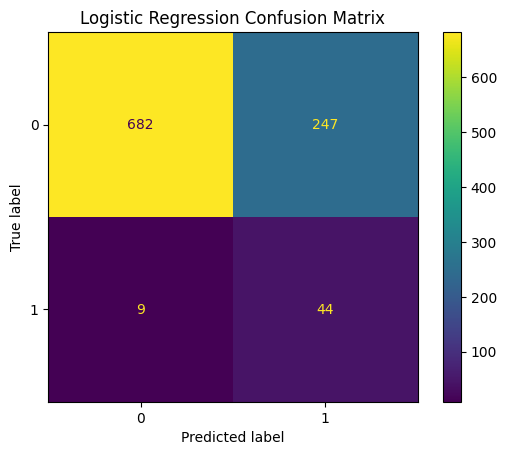

In [167]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#### Performance Metrics

In [168]:
# Check class distribution
print("Class distribution in y_train:\n", y_train.value_counts())

#Using  Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

Class distribution in y_train:
 stroke
0    3771
1     156
Name: count, dtype: int64


In [169]:
# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])  # ROC AUC Score

# Print metrics
print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Logistic Regression Metrics:
Accuracy: 0.7393
Precision: 0.1512
Recall: 0.8302
F1 Score: 0.2558
ROC AUC Score: 0.8492


Accuracy (0.7393): The model correctly predicted the outcomes 73.93% of the time. However, accuracy alone may not fully reflect performance due to imbalances in class distributions.

Precision (0.1512): Out of all the positive predictions made by the model, only 15.12% were actually positive. A low precision indicates a high number of false positives (instances incorrectly predicted as positive).

Recall (0.8302): The model was able to correctly identify 83.02% of the actual positive cases. High recall suggests the model is good at capturing true positives, though it comes at the cost of also predicting many false positives (low precision).

F1 Score (0.2558): This metric balances precision and recall, giving a single score that represents the trade-off. The relatively low F1 score suggests that the precision-recall trade-off is not optimal for your model.

ROC AUC Score (0.8492): The model has an 84.92% probability of distinguishing between the positive and negative classes. This high AUC score indicates that the model performs well in ranking positive instances higher than negative ones, despite precision being low.

### 2. K-Nearest Neighbors Evaluation


#### Predictions


In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid
param_grid_knn = {'n_neighbors': range(1, 21)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')

# Fit the model using DataFrames
grid_search_knn.fit(X_train, y_train)

# Get the best KNN model
best_knn = grid_search_knn.best_estimator_

# Make predictions with consistent DataFrame format
y_pred_knn = best_knn.predict(X_test)

# Print the predictions
#print("KNN Predictions:", y_pred_knn)


#### Confusion Matrix

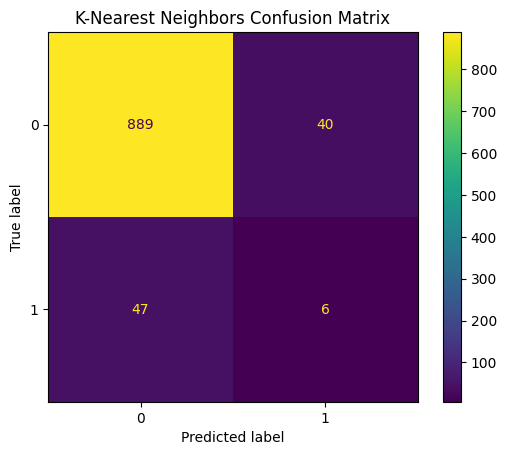

In [171]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

## Performance Metrics


In [172]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

K-Nearest Neighbors Metrics:
Accuracy: 0.9114
Precision: 0.1304
Recall: 0.1132
F1 Score: 0.1212


Accuracy (0.9114): The model correctly predicted the outcome 91.14% of the time. However, accuracy can be misleading if the dataset is imbalanced, as the model may predict the majority class more often.

Precision (0.1304): Of all the positive predictions made by the model, only 13.04% were actual positives. This low precision suggests that the model predicts many false positives.

Recall (0.1132): The model correctly identified only 11.32% of the actual positive cases. A low recall indicates that the model is missing many true positive instances, which means it has a high rate of false negatives.

F1 Score (0.1212): The F1 score, which balances precision and recall, is low at 0.1212. This reflects poor performance in terms of both detecting true positives and avoiding false positives.

## 5 Confusion Matrix Evaluation

#### Confusion matrix comparision of KNN and logistic regression

**K-Nearest Neighbors (KNN) Confusion Matrix:**

True Negatives (TN): 889

False Positives (FP): 40

False Negatives (FN): 47

True Positives (TP): 6

**Logistic Regression Confusion Matrix:**

True Negatives (TN): 684

False Positives (FP): 245

False Negatives (FN): 9

True Positives (TP): 44

 #### differences between false positives (FP) and false negatives (FN) 

Comparing False Positives and False Negatives:

**False Positives (FP)**:

In KNN, the number of false positives is 40, which is lower compared to 245 in Logistic Regression.
This means that Logistic Regression has a higher tendency to incorrectly classify a negative instance as positive compared to KNN.

**False Negatives (FN)**:

In KNN, the number of false negatives is 47, which is higher compared to 9 in Logistic Regression.
This indicates that KNN is more likely to miss positive cases, while Logistic Regression does better in correctly identifying positive instances.

 **Real-world implications of FP and FN**

In a healthcare setting where the goal is to predict whether a patient will suffer from a stroke,
the implications of false positives and false negatives are critical. 

**False Positives (FP):**

**Real-World Impact:**

**Psychological stress:** The patient may undergo unnecessary anxiety and stress after being wrongly informed they are at risk for a serious condition like stroke.

**Unnecessary testing:** The patient may be subjected to further expensive diagnostic tests such as MRIs, CT scans, and blood work. While these tests are generally safe, they add an extra financial burden and may contribute to hospital overcrowding.

**Medication risks:** In some cases, treatments or medications (such as anticoagulants) may be prescribed as a preventive measure, leading to side effects that were unnecessary in the first place.

In this case, Logistic Regression has a higher FP rate (245), which means this model may trigger more of the unnecessary actions described above, leading to more wasted resources and undue stress on patients.

**False Negatives (FN):**

**Real-World Impact:**

**Missed diagnosis:** A false negative can result in a stroke going undetected. Since strokes require immediate intervention, missing early signs could lead to severe consequences such as permanent disability or even death.

**Delayed treatment:** The patient will not receive the necessary preventive treatment (such as lifestyle changes, medications, or monitoring). This delay in care could increase the likelihood of a stroke occurring.

**Higher healthcare costs in the long term:** Once a stroke happens, the cost of treatment and rehabilitation is much higher than preventive care.

In this case, KNN has a higher FN rate (47), meaning it is more likely to miss cases of patients actually at risk of stroke. This could have devastating consequences, as undiagnosed patients might not receive the preventive care they need. Logistic Regression performs better with a much lower FN rate (9), making it a more suitable model in terms of preventing real-world harm.

In stroke prediction, false negatives are more dangerous than false positives, because failing to identify a patient at risk of stroke could have life-threatening consequences. Therefore, while Logistic Regression has a higher false positive rate, its ability to minimize false negatives makes it a more reliable choice in a healthcare context where safety and early detection are priorities.

## Summary

**Accuracy:** KNN performs better in terms of overall accuracy (91.1% vs. 74.1%), but this metric alone can be misleading, especially in datasets with imbalanced classes (e.g., stroke prediction where positive cases are rare).

**Precision:** Both models have low precision, but Logistic Regression slightly outperforms KNN. However, this metric is less important in medical diagnostics, where we prioritize minimizing false negatives.


## Conclusion

In the context of stroke prediction, Logistic Regression performs better than KNN. While KNN has a higher accuracy, its poor recall makes it unsuitable for this task. The high recall of Logistic Regression (83%) means it is much more reliable for identifying actual stroke cases, which is the primary objective in healthcare scenarios where false negatives can have serious, life-threatening consequences.
Thus, Logistic Regression is the better model for your dataset.